In [2]:
# Importing the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading and inspecting the dataframe

h_data = pd.read_csv(r"advanced regression assignment.csv")
h_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
h_data.describe(include='all')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
# checking the number of rows and columns
h_data.shape

(1460, 81)

In [6]:
h_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Checking the Null values

h_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
# Checking columns with one unique value since it won't affect our analysis
h_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [9]:
#Checking the value count

h_data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [10]:
h_data.Alley.value_counts()


Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
h_data.Street.value_counts()


Pave    1454
Grvl       6
Name: Street, dtype: int64

In [12]:
h_data.Utilities.value_counts()


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

DATA preparation

In [13]:
## Checking the percentage of Null values

df_missing=pd.DataFrame((round(100*(h_data.isnull().sum()/len(h_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [14]:
## Treating the NaN Values(coverting thme to 0 or nore)
h_data['PoolQC'] = h_data['PoolQC'].fillna('No_Pool')
h_data['MiscFeature'] = h_data['MiscFeature'].fillna('None')
h_data['Alley'] = h_data['Alley'].fillna('No_Alley_Access')
h_data['Fence'] = h_data['Fence'].fillna('No_Fence')
h_data['FireplaceQu'] = h_data['FireplaceQu'].fillna('No_Fireplace')
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].fillna(0)
h_data['MasVnrType'] = h_data['MasVnrType'].fillna('None')
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['Electrical'] = h_data['Electrical'].fillna("Other")

In [15]:
## Dropping the LotFontgage columns as it have more Null values
h_data.drop("LotFrontage",axis = 1, inplace=True)

In [16]:
# Imputing the Nan Values with 'No Basementh_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    h_data[col] = h_data[col].fillna('No_Basement')

In [17]:
#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    h_data[col] = h_data[col].fillna('No_Garage')

In [18]:
h_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [19]:
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].astype(int)


EDA


Univariate and bivariate analysis

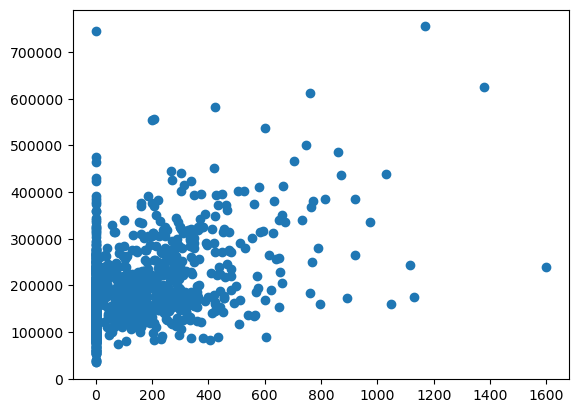

In [20]:
plt.scatter(h_data.MasVnrArea,h_data.SalePrice)


Text(0.5, 1.0, 'Veneer Area')

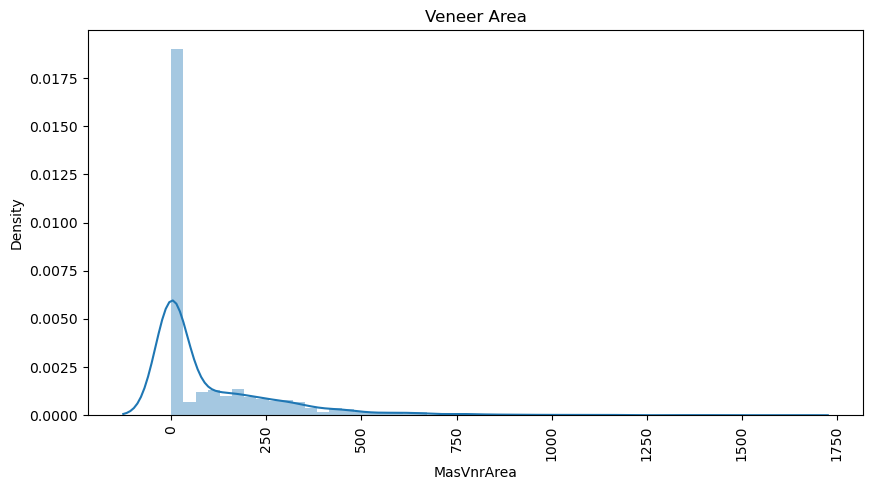

In [21]:
# plotting a distplot 
plt.figure(figsize = (10,5))
sns.distplot(h_data['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

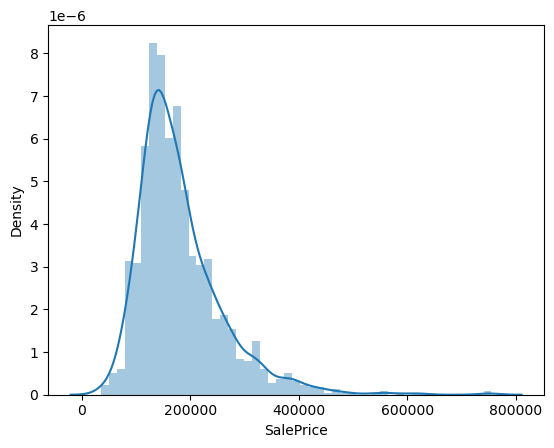

In [22]:
sns.distplot(h_data['SalePrice'])


In [23]:
print("Skewness: %f" % h_data['SalePrice'].skew())
print("Kurtosis: %f" % h_data['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Basement Condition')

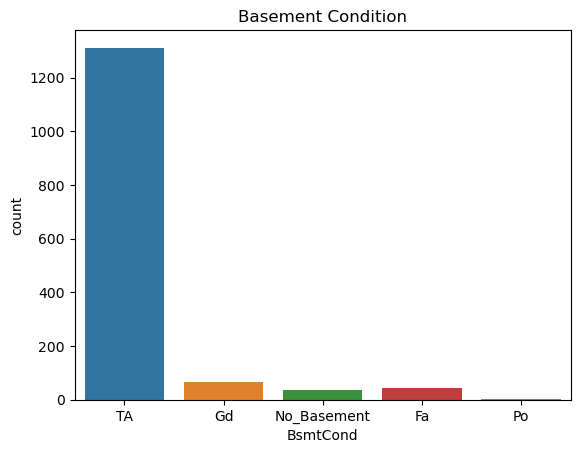

In [24]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= h_data)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

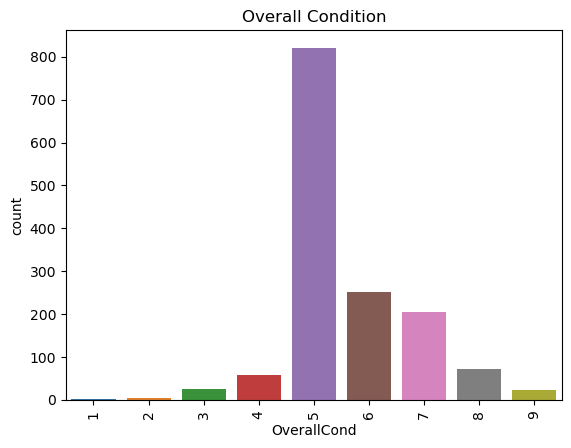

In [25]:
sns.countplot(x='OverallCond', data= h_data).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

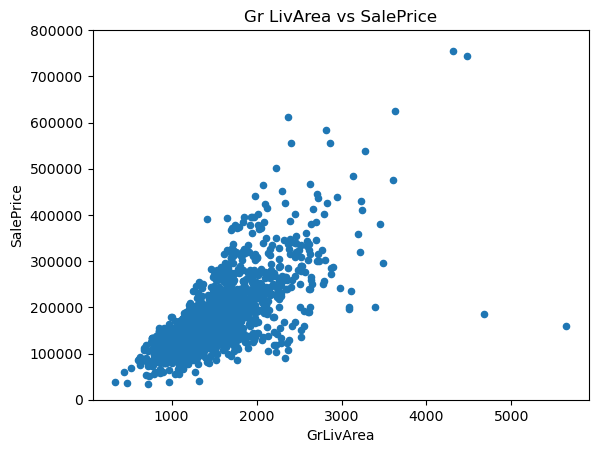

In [26]:
data = pd.concat([h_data['SalePrice'], h_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

<AxesSubplot:xlabel='SalePrice'>

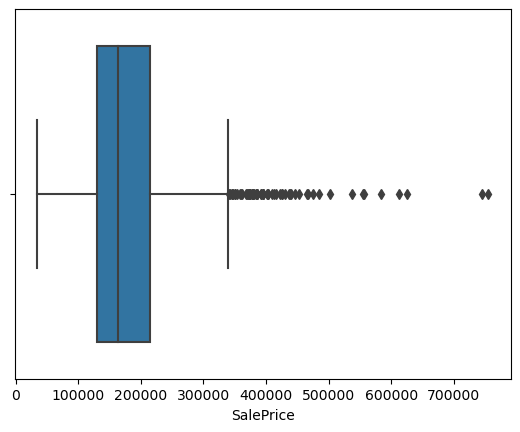

In [27]:
# Checking the outliers 

sns.boxplot(x='SalePrice', data=h_data)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

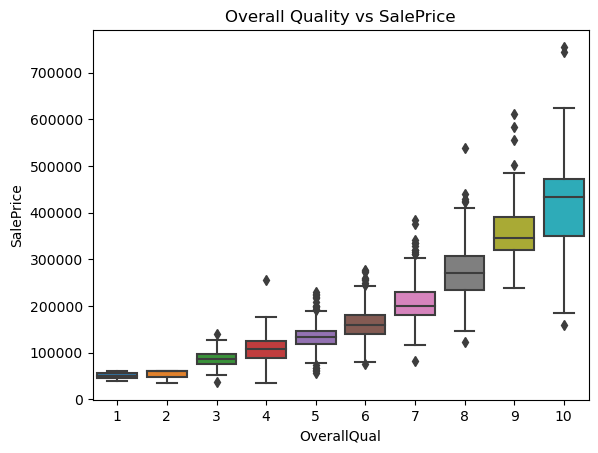

In [28]:
sns.boxplot(x='OverallQual', y='SalePrice', data=h_data)
plt.title("Overall Quality vs SalePrice")

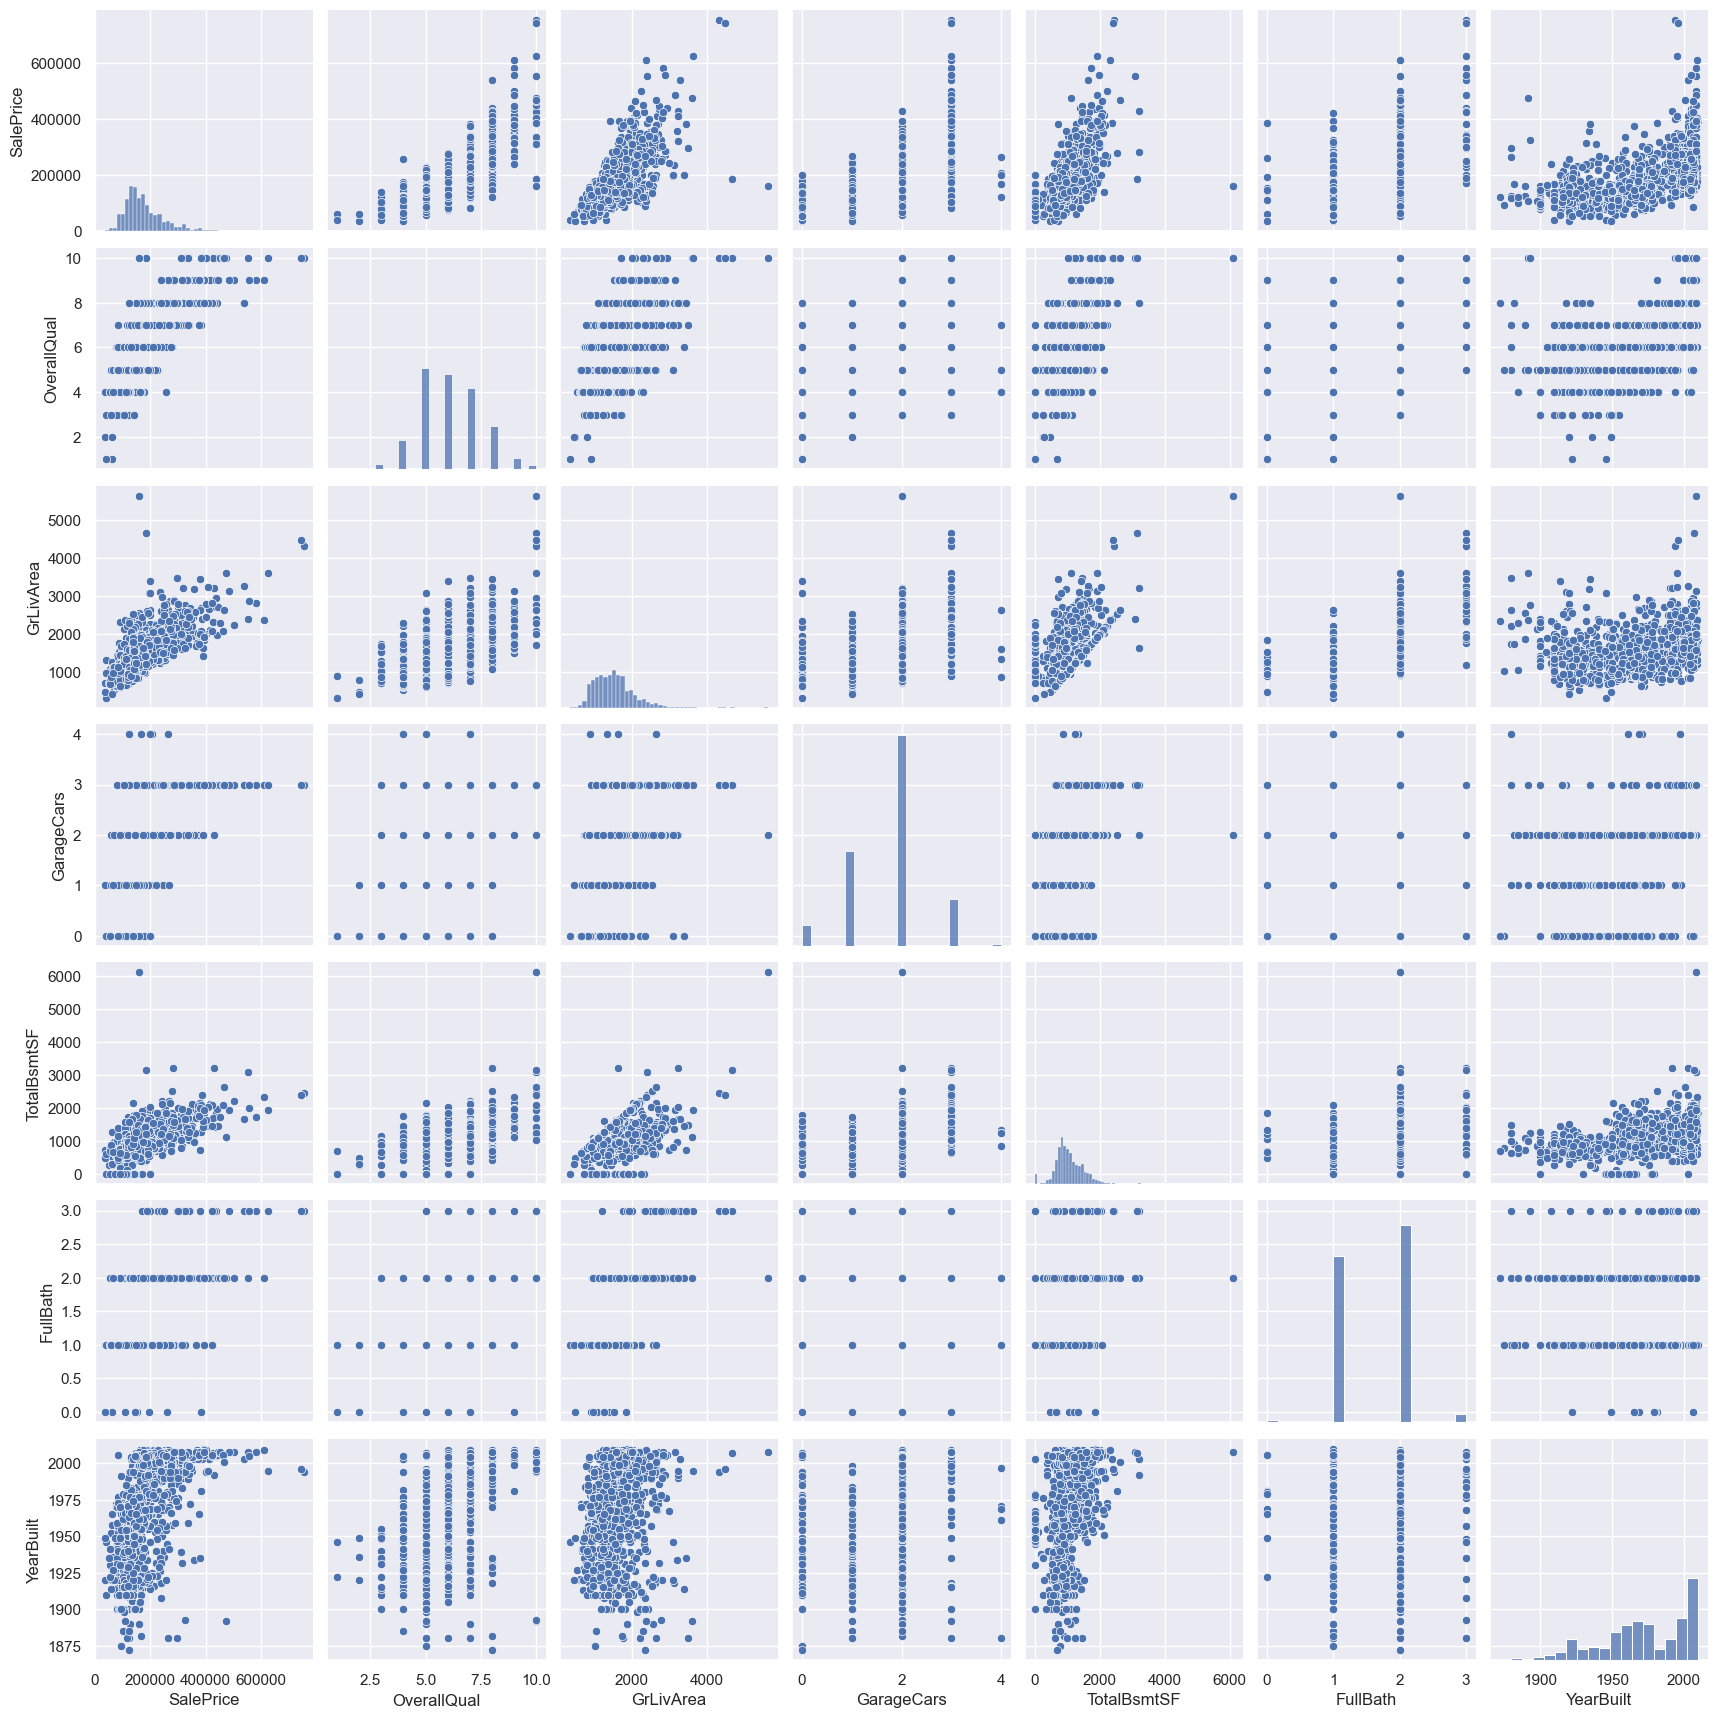

In [29]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(h_data[cols], size = 2.5)
plt.show();

Text(0.5, 1.0, 'Checking Correlation matrix ')

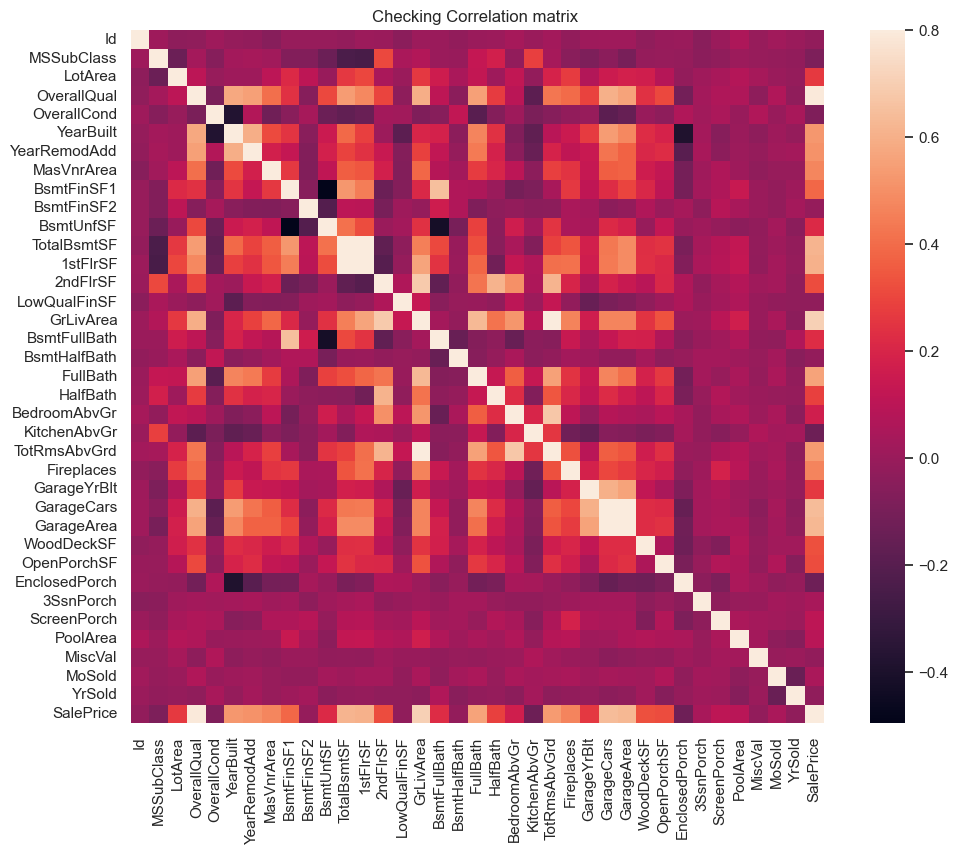

In [30]:
#correlation matrix
corrmat = h_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

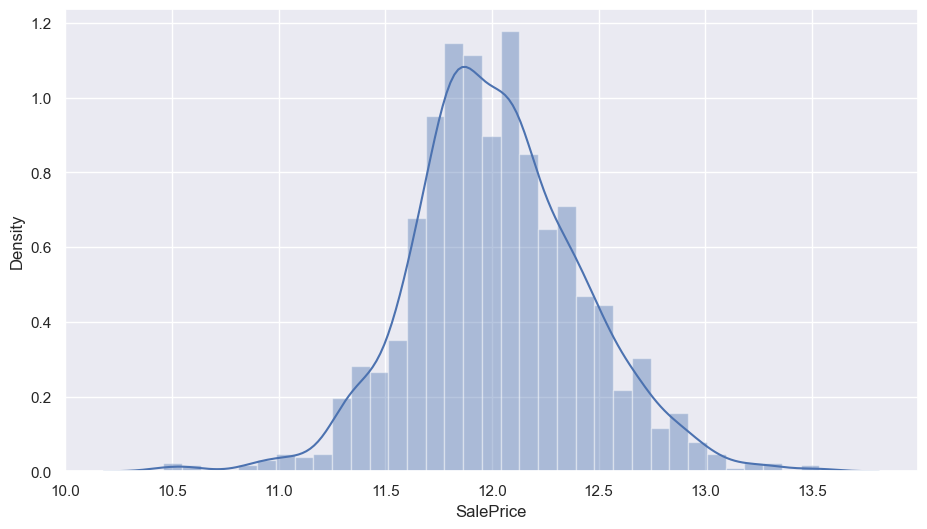

In [31]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(h_data["SalePrice"]))

Deriving new variables


In [36]:
numeric_data = h_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [37]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1
h_data['Street'] = h_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

h_data['CentralAir'] = h_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
h_data['PavedDrive'] = h_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)  

In [38]:
cat_values = h_data.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [39]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
## Droping the 'Id' column 
df = h_data.drop(['Id'],axis=1)

In [41]:
# Droping the original categorical column
df = df.drop(list(cat_values.columns), axis=1)

In [42]:
# Adding the dummy categorical column to original dataset
df = pd.concat([df,data_dummies], axis=1)

In [43]:
df.shape


(1460, 259)

# # # # #Train test split

In [44]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)


In [45]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [46]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [47]:
#Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

# # # #Model building

In [48]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [49]:
# Calculating the RFE
rfe = RFE(reg, step = 20)
rfe = rfe.fit(X_train, y_train)

In [50]:
col=X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea',
       ...
       'Fence_GdWo', 'MiscFeature_Othr', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=129)

In [51]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     147.8
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        16:59:03   Log-Likelihood:                 1033.7
No. Observations:                1021   AIC:                            -1829.
Df Residuals:                     902   BIC:                            -1243.
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        9.6091      0.166     57.904      0.000       9.283       9.935
LotArea                      0.0323      0.004      7.183      0.000       0.023       0.041
OverallQual                  0.0585      0.006      9.305      0.000       0.046       0.071
OverallCond                  0.0510      0.004     12.619      0.000       0.043       0.059
YearBuilt                    0.0954      0.008     11.752      0.000       0.079       0.111
BsmtFinSF1                   0.0438      0.003     15.118      0.000       0.038       0.049
BsmtFinSF2                   0.0105      0.003      3.198      0.001       0.004       0.017
BsmtUnfSF                   -0.0005      0.003     -0.187      0.852      -0.006       0.005
TotalBsmtSF                  0.0478      0.004     12.394      0.000       0.040       0.055
GrLivArea                    0.1599      0.006     28.864      0.000       0.149       0.171
GarageArea                   0.0366      0.005      7.151      0.000       0.027       0.047
MSZoning_FV                  0.4651      0.053      8.807      0.000       0.361       0.569
MSZoning_RH                  0.4717      0.052      9.007      0.000       0.369       0.575
MSZoning_RL                  0.4746      0.044     10.726      0.000       0.388       0.561
MSZoning_RM                  0.4026      0.042      9.517      0.000       0.320       0.486
LandSlope_Sev               -0.2185      0.053     -4.145      0.000      -0.322      -0.115
Neighborhood_BrkSide         0.1004      0.021      4.784      0.000       0.059       0.142
Neighborhood_ClearCr         0.0701      0.026      2.737      0.006       0.020       0.120
Neighborhood_Crawfor         0.1594      0.020      8.054      0.000       0.121       0.198
Neighborhood_IDOTRR          0.0664      0.027      2.414      0.016       0.012       0.120
Neighborhood_MeadowV        -0.1365      0.040     -3.384      0.001      -0.216      -0.057
Neighborhood_NoRidge         0.0295      0.020      1.490      0.137      -0.009       0.068
Neighborhood_NridgHt         0.0424      0.017      2.462      0.014       0.009       0.076
Neighborhood_OldTown         0.0683      0.021      3.313      0.001       0.028       0.109
Neighborhood_SWISU           0.0825      0.027      3.022      0.003       0.029       0.136
Neighborhood_Somerst         0.0726      0.027      2.688      0.007       0.020       0.126
Neighborhood_StoneBr         0.0907      0.028      3.225      0.001       0.036       0.146
Neighborhood_Veenker         0.0525      0.031      1.677      0.094      -0.009       0.114
Condition1_Feedr             0.0650      0.020      3.220      0.001       0.025       0.105
Condition1_Norm              0.1005      0.015      6.488      0.000       0.070       0.131
Condition1_Pos

# # # # Ridge regression


In [53]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
-0.08888098944882784


In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022540,1.018218e-02,0.005585,4.883441e-04,0.0001,{'alpha': 0.0001},-0.091274,-0.095970,-0.095115,-0.087270,...,-0.090442,0.004999,14,-0.054605,-0.055116,-0.055868,-0.056766,-0.055703,-0.055612,0.000730
1,0.015558,3.128317e-03,0.006383,2.238825e-03,0.001,{'alpha': 0.001},-0.090983,-0.095920,-0.095063,-0.087130,...,-0.090319,0.005012,13,-0.054636,-0.055125,-0.055882,-0.056849,-0.055737,-0.055646,0.000748
2,0.011969,5.001110e-07,0.004388,4.879355e-04,0.01,{'alpha': 0.01},-0.090336,-0.095578,-0.094677,-0.086390,...,-0.089882,0.004969,8,-0.054827,-0.055242,-0.056021,-0.057084,-0.055876,-0.055810,0.000770
3,0.013165,2.393651e-03,0.004986,3.504023e-07,0.05,{'alpha': 0.05},-0.089986,-0.094656,-0.094106,-0.084322,...,-0.089209,0.004837,4,-0.055804,-0.055717,-0.056608,-0.057731,-0.056751,-0.056522,0.000733
4,0.011968,1.168008e-07,0.004588,4.884221e-04,0.1,{'alpha': 0.1},-0.089849,-0.094134,-0.094175,-0.082815,...,-0.088881,0.004961,1,-0.057018,-0.056194,-0.057298,-0.058636,-0.057873,-0.057404,0.000820
5,0.011968,9.464947e-07,0.004587,4.888502e-04,0.2,{'alpha': 0.2},-0.090371,-0.093811,-0.094777,-0.081243,...,-0.088886,0.005316,2,-0.059147,-0.056934,-0.058598,-0.060613,-0.059764,-0.059011,0.001236
6,0.011968,1.091448e-03,0.004787,3.985406e-04,0.3,{'alpha': 0.3},-0.090967,-0.093766,-0.095287,-0.080172,...,-0.089004,0.005682,3,-0.060826,-0.057553,-0.059779,-0.062291,-0.061428,-0.060376,0.001631
7,0.016156,3.805413e-03,0.005585,1.738587e-03,0.4,{'alpha': 0.4},-0.091500,-0.093849,-0.095743,-0.079512,...,-0.089267,0.005926,5,-0.062214,-0.058068,-0.060730,-0.063693,-0.062831,-0.061507,0.001973
8,0.011968,6.143617e-07,0.004787,3.989464e-04,0.5,{'alpha': 0.5},-0.091857,-0.093888,-0.096105,-0.079479,...,-0.089534,0.005980,6,-0.063437,-0.058535,-0.061536,-0.064837,-0.063983,-0.062466,0.002244
9,0.011569,4.880525e-04,0.004588,4.888115e-04,0.6,{'alpha': 0.6},-0.092051,-0.093944,-0.096400,-0.079521,...,-0.089741,0.006008,7,-0.064470,-0.058963,-0.062212,-0.065800,-0.064951,-0.063279,0.002463


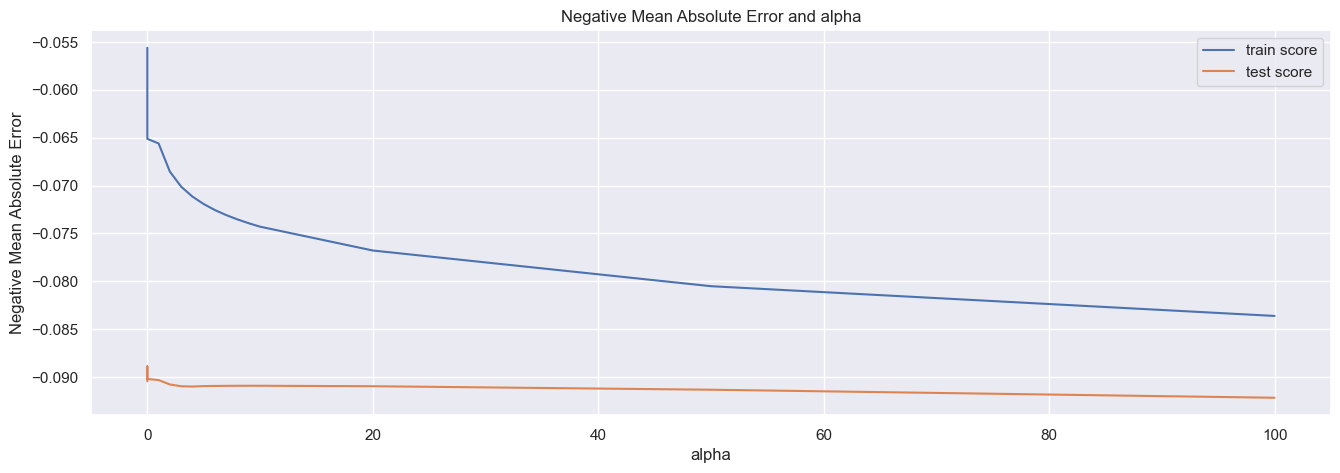

In [56]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [57]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.13588683e-02,  1.89916299e-02,  7.32788104e-03,  7.96272008e-02,
        4.07795269e-02,  3.72507374e-02,  2.05612877e-02, -2.78758819e-03,
       -1.30338491e-03,  7.00573179e-03,  4.35785540e-03,  5.54550229e-03,
        1.48199078e-02,  3.71802799e-02,  4.20642007e-02,  8.38654798e-04,
        6.23082078e-02,  2.96128365e-02,  2.70973194e-03,  1.87339625e-02,
        1.07448695e-02,  1.20910988e-02, -1.36071727e-02,  1.55763919e-02,
        2.26747431e-03, -1.68263637e-07,  4.02874958e-02,  4.26597599e-03,
        1.44157825e-03,  1.36107502e-02, -2.04563445e-03,  8.78571434e-03,
        7.21095211e-03,  1.06190229e-02, -1.48411310e-02, -1.44232684e-06,
       -1.10809910e-03, -6.42496907e-03,  4.82665535e-02,  3.90986114e-02,
        6.20215882e-02,  1.56874684e-02,  2.13182526e-03,  2.59755306e-02,
        2.43135413e-02, -5.00428493e-02,  4.82153805e-03,  3.82124377e-02,
        3.57786634e-02,  4.68949873e-02, -1.30779083e-02,  3.69460173e-02,
       -3.54873205e-02, -

In [58]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9220052574594756


In [59]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8855287818493236


In [60]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.01883510757361557

# # # #Lasso regression

In [61]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)


In [63]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08335757905208412


In [64]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [65]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9174442574972889


In [68]:
lasso.coef_


array([-1.58986880e-02,  1.77328839e-02,  7.45493006e-03,  8.92609173e-02,
        4.49733107e-02,  5.24420084e-02,  2.11904683e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.73403190e-02,
        1.31726648e-02,  5.57365739e-04,  0.00000000e+00, -2.81043595e-03,
        1.18031173e-01,  3.11416982e-02,  2.03120136e-03,  1.33933861e-02,
        8.44317064e-03,  5.66696196e-03, -1.15603901e-02,  1.31358396e-02,
        6.75562031e-03, -1.47256115e-06,  3.89265887e-02,  5.91793364e-03,
        1.83237079e-03,  1.28752008e-02, -0.00000000e+00,  6.00119886e-03,
        5.33435901e-03,  1.05851336e-02, -1.35222907e-02, -9.35029429e-04,
       -1.36117711e-03, -5.93902219e-03,  0.00000000e+00,  0.00000000e+00,
        4.66696364e-02, -7.07128010e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.49559431e-03, -0.00000000e+00,  2.89713629e-02,
       -0.00000000e+00, -

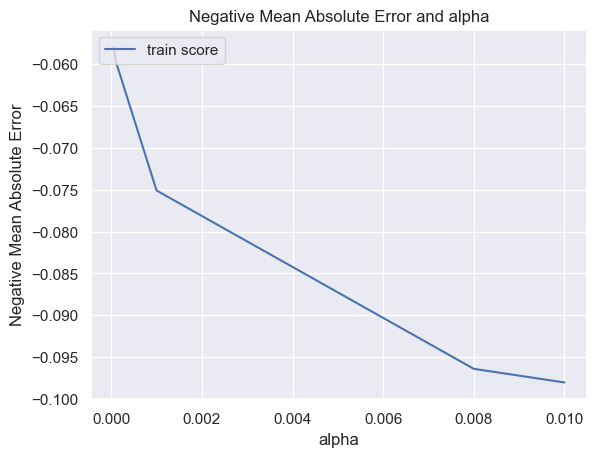

In [69]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [71]:
model_cv.best_params_

{'alpha': 0.1}

In [115]:
ridge = Ridge(alpha = 0.2)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9553979560480054
0.7864035790812623


In [110]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']


In [112]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,MSSubClass,10.974991
41,MSZoning_RL,0.368570
39,MSZoning_FV,0.363079
40,MSZoning_RH,0.361342
42,MSZoning_RM,0.326664
114,RoofMatl_Membran,0.319111
119,RoofMatl_WdShngl,0.276994
116,RoofMatl_Roll,0.258545
92,Condition2_PosA,0.239357
248,SaleType_ConLD,0.220710


In [93]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9174442574972889
0.855123192817482


In [113]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8921940497658922
0.8774018105216189


In [107]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']


In [108]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,11.870945
17,BsmtFullBath,0.118031
63,Neighborhood_Crawfor,0.108180
78,Neighborhood_Somerst,0.096083
4,OverallCond,0.089261
73,Neighborhood_NridgHt,0.077361
83,Condition1_Norm,0.055918
122,Exterior1st_BrkFace,0.055503
6,YearRemodAdd,0.052442
172,BsmtExposure_Gd,0.049821


In [82]:
Most efficient alpha value for Lasso : {'alpha': 0.001}
Most efficient value for Ridge : {'alpha': 0.1}

SyntaxError: invalid syntax (1985030245.py, line 1)

In [84]:
## Let us build the ridge regression model with double value of alpha i.e. 0.2
ridge = Ridge(alpha=0.2)

# Fit the model on training data
ridge.fit(X_train, y_train)


Ridge(alpha=0.2)

In [89]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [90]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7864035790812623


In [95]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.023838046736017568